In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

In [4]:
df1 = pd.read_csv("labs.csv")
df2 = pd.read_csv("examination.csv")
df3 = pd.read_csv("demographic.csv")
df4 = pd.read_csv("diet.csv")
df5 = pd.read_csv("questionnaire.csv")

df2.drop(['SEQN'], axis=1, inplace=True)
df3.drop(['SEQN'], axis=1, inplace=True)
df4.drop(['SEQN'], axis=1, inplace=True)
df5.drop(['SEQN'], axis=1, inplace=True)

df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')

df.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,...,14.0,28.0,4036.000000,4842.000000,2667.000000,5879.000000,5800.000000,1424.000000,1424.000000,1424.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,...,35.0,40.0,413.440287,567.920074,373.831646,315.447355,574.222069,2.586376,2.295646,1.747893
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,...,0.0,0.0,1511.368399,1975.492188,1716.831150,1075.040013,7288.930842,0.782529,1.210905,0.707600
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,...,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,...,35.0,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000
50%,78643.000000,8.400000,8.400000,106.000000,9370.400000,7.780000,56397.702304,84.000000,0.840000,4.300000,...,35.0,40.0,165.000000,150.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000
75%,81191.000000,17.625000,17.625000,163.000000,14409.200000,15.295000,99356.561999,101.000000,1.010000,4.500000,...,35.0,40.0,198.000000,180.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000
max,83731.000000,9600.000000,9600.000000,659.000000,58255.600000,9000.000000,395978.465792,234.000000,2.340000,5.600000,...,35.0,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000


In [5]:
df.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [7]:
df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')
df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', # Nan -> american i guess
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})
df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]
df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,1837.000000,9051.000000,6643.000000,9301.000000,7218.000000,7677.000000,8661.000000
mean,78644.559971,1.509426,8.933043,2.253101,5.642556,28.485765,21.114034,63.054891,1.984528
std,2938.592266,0.499937,17.787060,1.635458,1.004850,7.961971,4.963949,25.098439,0.123426
min,73557.000000,1.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,3.000000,0.870000,5.200000,22.600000,17.300000,45.600000,2.000000
50%,78643.000000,2.000000,5.000000,1.710000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,7.000000,3.610000,5.800000,34.000000,24.400000,80.700000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


In [8]:
from sklearn.feature_selection import VarianceThreshold

df.dropna(axis=1, how='all')
df.dropna(axis=0, how='all')

df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x> 0 else 0)

df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())

df['Family_income'] = df['Family_income'].fillna(method='ffill')

df['Breast_fed'] = df['Breast_fed'].fillna(value = 1)

sel = VarianceThreshold(threshold=(0.15))
sel.fit_transform(df)

df.describe()


,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,1.509426,1.672271,2.246973,5.564201,28.528248,21.004545,62.455233,1.868949
std,2938.592266,0.499937,8.446506,1.635495,0.834491,7.753571,4.261142,22.228196,0.337473
min,73557.000000,1.000000,0.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,0.000000,0.870000,5.300000,23.200000,18.500000,50.300000,2.000000
50%,78643.000000,2.000000,0.000000,1.700000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,0.000000,3.600000,5.600000,33.800000,22.900000,73.300000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


In [9]:
df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

df.head(10)

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0.0,0.84,13.9,35.3,20.6,55.2,2.0,2.0
1,73558,1,0.0,1.78,9.1,34.7,24.4,61.5,2.0,2.0
2,73559,1,0.0,4.51,8.9,33.5,25.6,91.0,2.0,2.0
3,73560,1,0.0,2.52,5.4,21.0,14.9,32.2,2.0,0.0
4,73561,2,0.0,5.00,4.9,25.2,20.7,30.9,2.0,0.0
5,73562,1,0.0,4.79,5.5,41.8,29.1,53.1,2.0,0.0
6,73563,1,0.0,5.00,5.4,14.9,20.7,60.3,1.0,0.0
7,73564,2,0.0,5.00,5.5,38.0,26.7,45.9,2.0,0.0
8,73566,1,0.0,5.00,5.4,29.0,19.9,38.8,2.0,0.0
9,73567,2,0.0,0.48,5.2,27.5,20.0,43.5,2.0,0.0


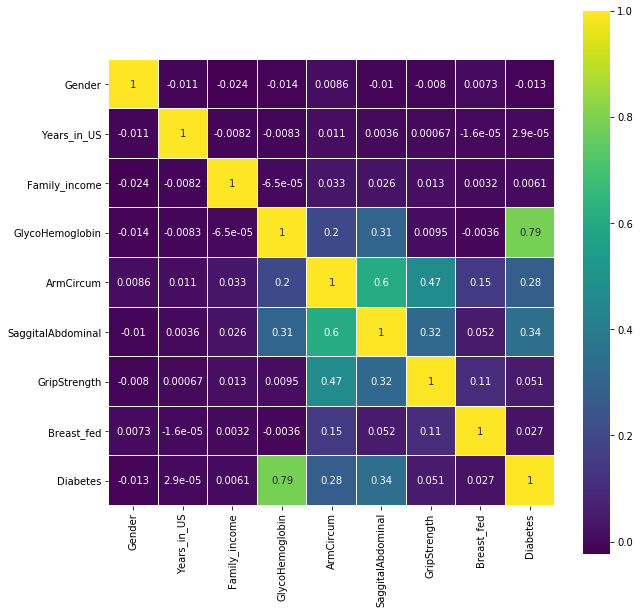

In [10]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)